# Análisis de Consumo Energético y Clustering con K-Means

## Objetivos del Cuaderno

1. **Clustering con K-Means**: Aplicar el algoritmo de K-Means para agrupar las viviendas en función de sus patrones de consumo energético.
6. **Validación del Modelo**: Evaluar la calidad de los clusters generados utilizando metedos y visualizaciones adecuadas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("dataset/features_StandardScaler.csv", index_col='cups')
df_features_final = pd.read_csv("dataset/features_KNNImputer.csv", index_col='cups')

In [ ]:
X = df.values
best_k = 7

In [ ]:
with open("pkls/kmeans_24h_model_watts.pkl", "rb") as f:
    kmeans_final = pickle.load(f)

if hasattr(kmeans_final, 'labels_'):
    labels = kmeans_final.labels_

if hasattr(kmeans_final, 'cluster_centers_'):
    centroids = kmeans_final.cluster_centers_

## Árbol de Decisión para Interpretar Clusters

### **Objetivo**  
Crear un árbol de decisión que explique cómo se asignaron los clusters de tu modelo KMeans, usando reglas comprensibles en unidades originales.

#### Pasos: 
1. **Entrenar un árbol de decisión**  
   - **Variables predictoras**: Features originales (sin normalizar).  
2. **Garantizar interpretabilidad**  
   - Limitar la profundidad del árbol (`max_depth=5`).  
   - Asegurar que todos los clusters aparezcan en las hojas.  
3. **Generar reglas de negocio**  


In [116]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text

In [117]:
X = df_features_final
y = labels

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Explicaciónde las variables del Árbol de Decisión
**Valores de cada nodo**
1. values = [a, b, c]
- Qué es:  
  - Número de muestras en cada cluster.  
  - Ejemplo: [30, 10, 5] → 30 en Cluster 0, 10 en Cluster 1, 5 en Cluster 2.
2. gini = X.XX  
- Qué es:  
  - "Suciedad" del nodo:  
    - 0 = Perfectamente ordenado (todas las muestras son del mismo cluster).  
    - ~0.5 = Muy mezclado (varios clusters balanceados).  
3. Consumo <= 150 (ejemplo)  
- Qué es:    
  - Regla de división: Si el valor es ≤ 150, sigue por la izquierda; si no, por la derecha.
4. samples = XX
- Qué es:   
  - Total de muestras en ese nodo.
5. cluster = X 
- Qué es:   
  - Cluster que predomina.

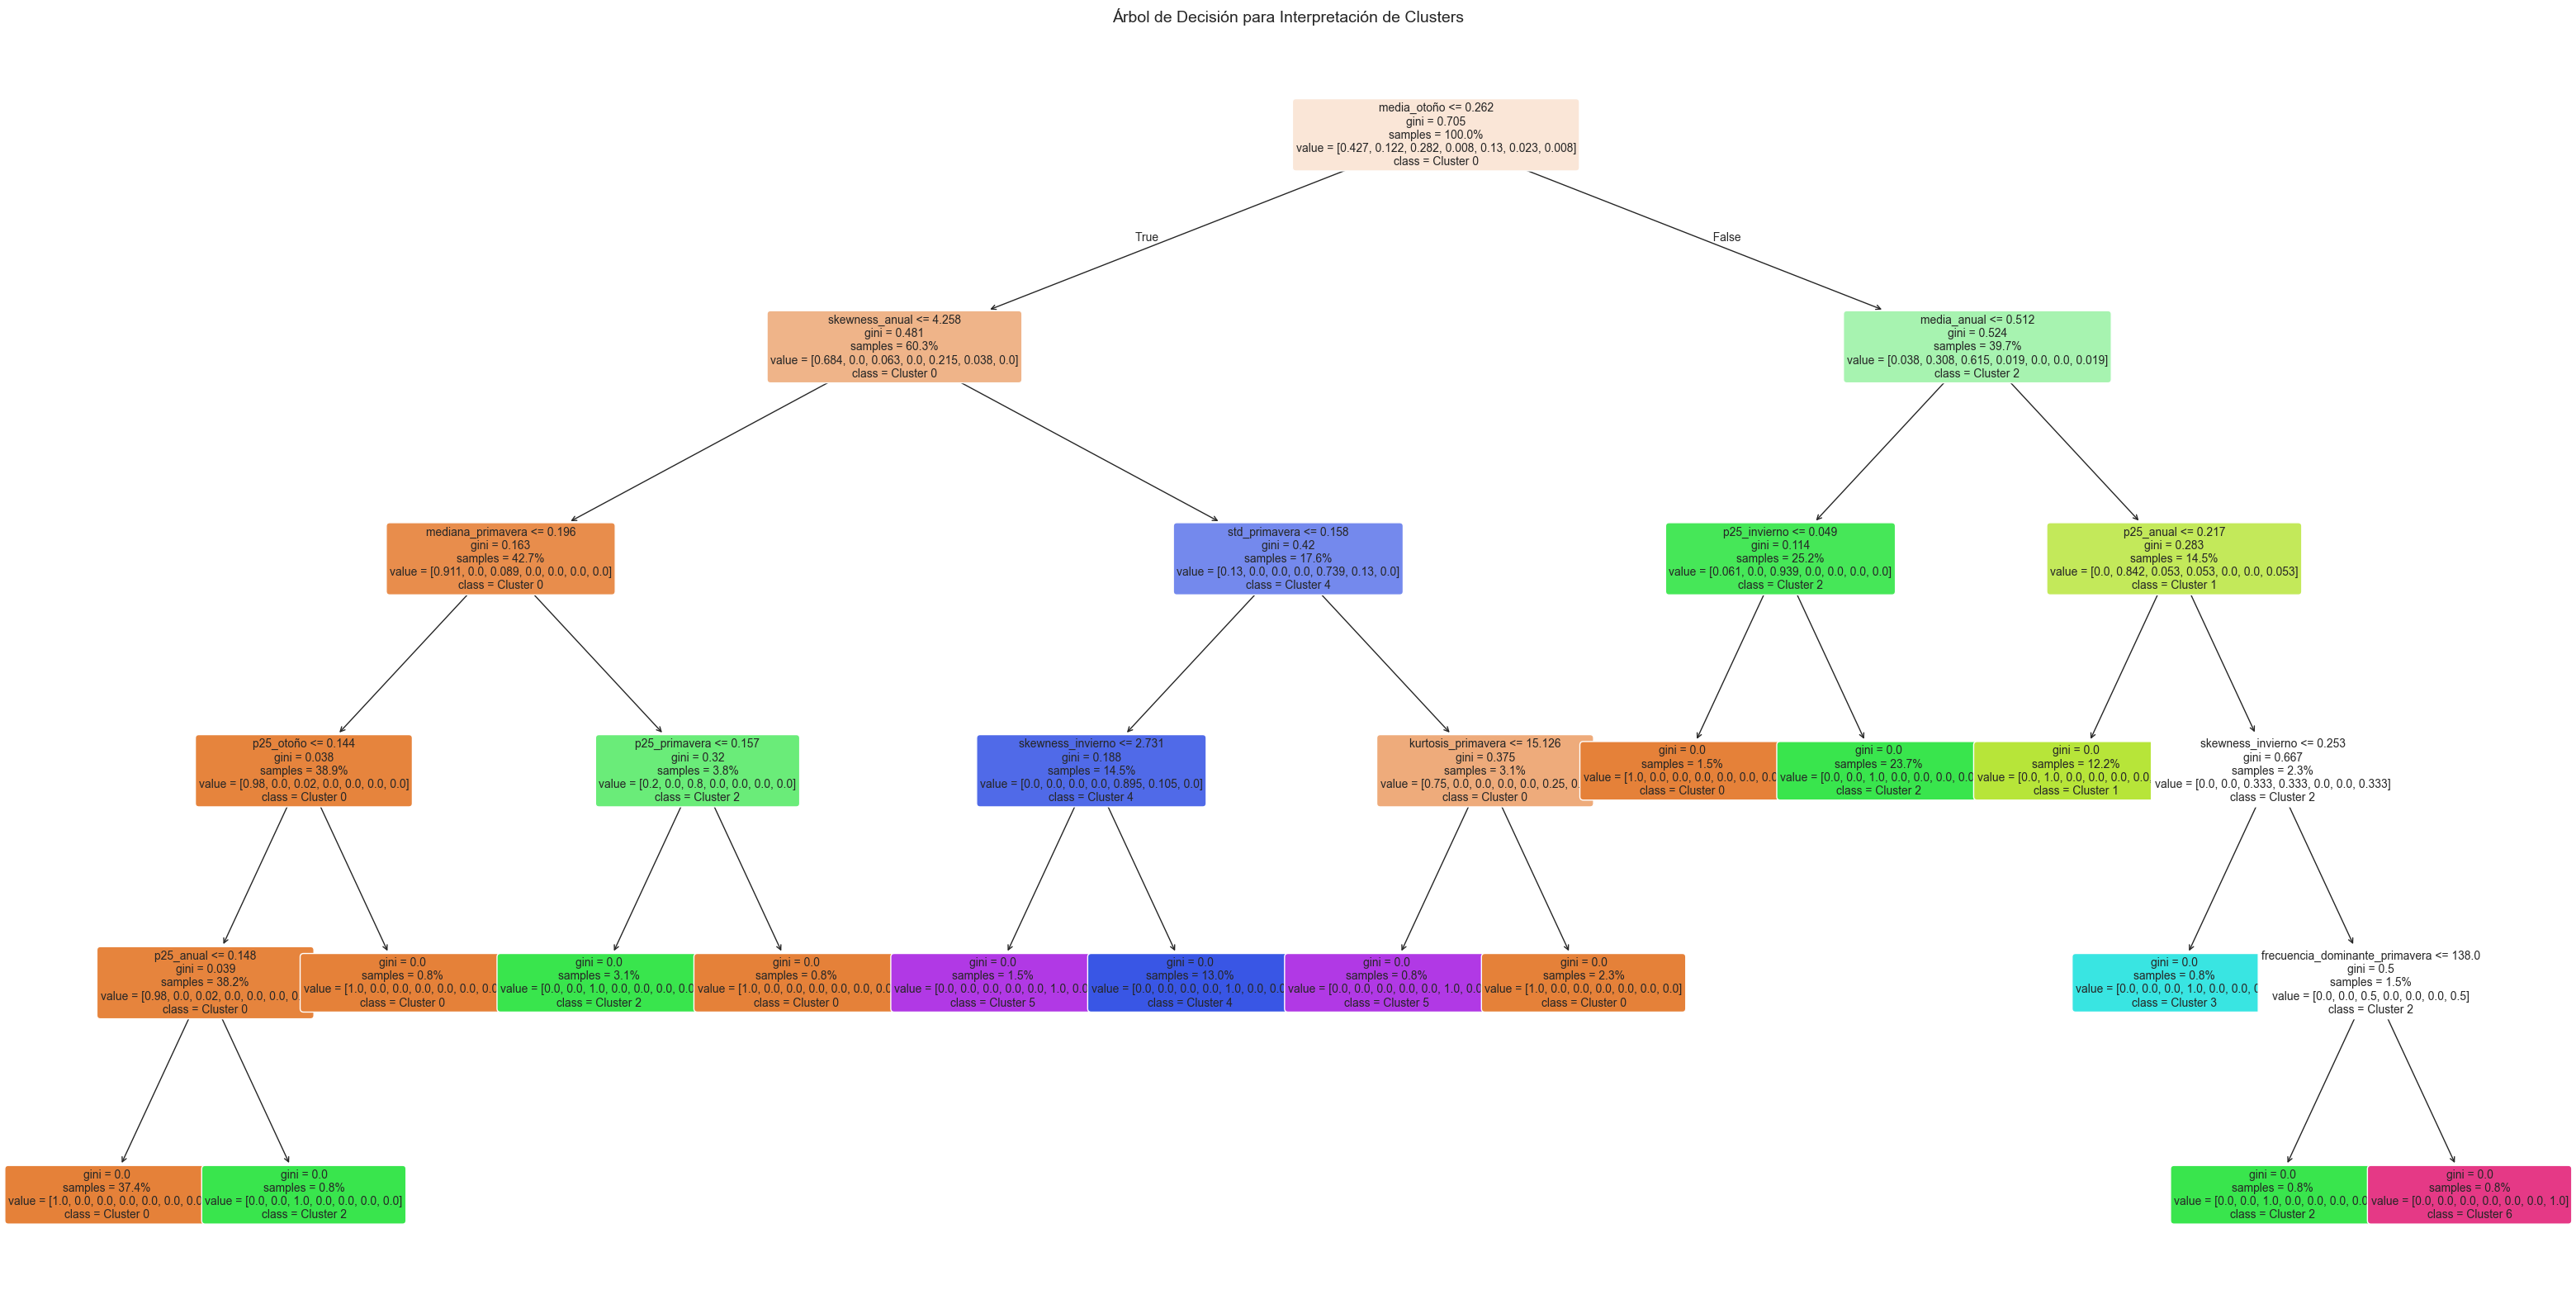

In [118]:
plt.figure(figsize=(40, 20))
plot_tree(tree,
          feature_names=X.columns,
          class_names=[f'Cluster {i}' for i in range(best_k)],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)
plt.title('Árbol de Decisión para Interpretación de Clusters', fontsize=14)
plt.show()

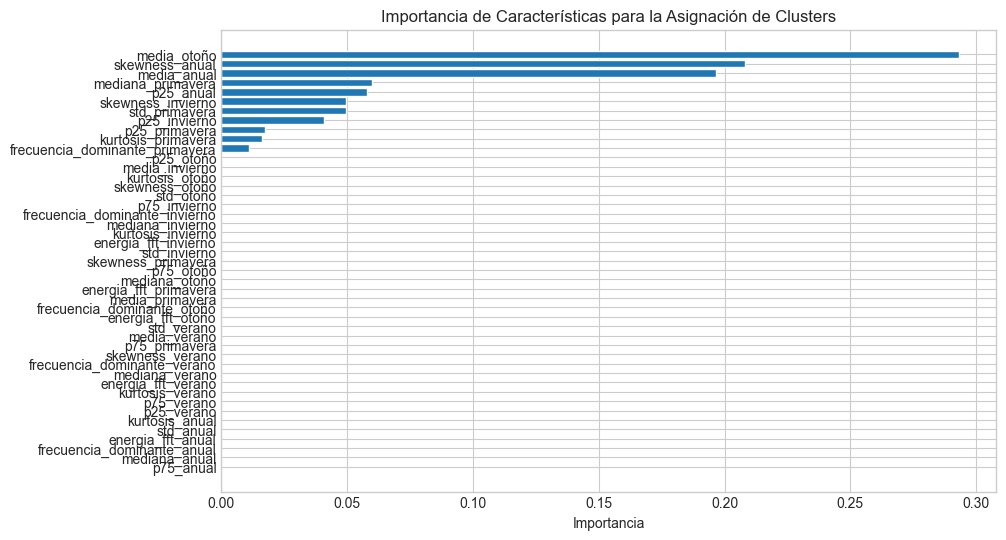

In [119]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importancia')
plt.title('Importancia de Características para la Asignación de Clusters')
plt.gca().invert_yaxis()
plt.show()

In [120]:
tree_rules = export_text(tree,
                        feature_names=list(X.columns),
                        spacing=3,
                        decimals=2)
print(tree_rules)

|--- media_otoño <= 0.26
|   |--- skewness_anual <= 4.26
|   |   |--- mediana_primavera <= 0.20
|   |   |   |--- p25_otoño <= 0.14
|   |   |   |   |--- p25_anual <= 0.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- p25_anual >  0.15
|   |   |   |   |   |--- class: 2
|   |   |   |--- p25_otoño >  0.14
|   |   |   |   |--- class: 0
|   |   |--- mediana_primavera >  0.20
|   |   |   |--- p25_primavera <= 0.16
|   |   |   |   |--- class: 2
|   |   |   |--- p25_primavera >  0.16
|   |   |   |   |--- class: 0
|   |--- skewness_anual >  4.26
|   |   |--- std_primavera <= 0.16
|   |   |   |--- skewness_invierno <= 2.73
|   |   |   |   |--- class: 5
|   |   |   |--- skewness_invierno >  2.73
|   |   |   |   |--- class: 4
|   |   |--- std_primavera >  0.16
|   |   |   |--- kurtosis_primavera <= 15.13
|   |   |   |   |--- class: 5
|   |   |   |--- kurtosis_primavera >  15.13
|   |   |   |   |--- class: 0
|--- media_otoño >  0.26
|   |--- media_anual <= 0.51
|   |   |--- p25_invierno <= 